In [3]:
import pandas as pd
import numpy as np

import glob
import importlib
import os
import matplotlib.pyplot as plt

from modules.utilities import *
from modules.constants import *

plt.rcParams.update(mpl_params)
TOPIC_DIR = "./Outputs/BERTopic/Topics"

In [4]:
topic_map = {
    "topic_0": "",
    "topic_1": "",
    "topic_2": "",
    "topic_3": "",
    "topic_4": "",
    "topic_5": "",
    "topic_6": "",
    "topic_7": "",
    "topic_8": "",
    "topic_9": "",
    "topic_10": "",
    "topic_11": "",
    "topic_12": "",
    "topic_13": "",
    "topic_14": "",
    "topic_15": "",
    "topic_16": "",
    "topic_17": "",
    "topic_18": "",
    "topic_19": "",
    "topic_20": "",
    "topic_21": "",
    "topic_22": "",
    "topic_23": "",
    "topic_24": "",
    "topic_25": "",
    "topic_26": "",
    "topic_27": "",
    "topic_28": "",
    "topic_29": "",
    "topic_30": "",
    "topic_31": "",
    "topic_32": "",
    "topic_33": "",
    "topic_34": "",
    "topic_35": "",
    "topic_36": "",
    "topic_37": "",
    "topic_38": "",
    "topic_39": "",
    "topic_40": "",
    "topic_41": "",
    "topic_42": "",
    "topic_43": "",
    "topic_44": "",
    "topic_45": "",
    "topic_46": "",
    "topic_47": "",
    "topic_48": "",
    "topic_49": "",
    "topic_50": "",
    "topic_51": ""
}


In [16]:
names = []
values = []

for topic_file in glob.glob(os.path.join(TOPIC_DIR, "*.csv")):
    if "-1" not in topic_file:
        topic_name = os.path.basename(topic_file).replace(".csv", "")
        df = pd.read_csv(topic_file)
        count = len(df)
        names.append(topic_name)
        values.append(count)

summary_df = pd.DataFrame({
    "Topic": names,
    "Count": values
})

summary_df["Parcent"] = (summary_df["Count"] / summary_df["Count"].sum()) * 100
summary_df = summary_df.sort_values("Count", ascending=False)

names = summary_df["Topic"].values
values = summary_df["Count"].values
percentages = summary_df["Parcent"].values

In [17]:
summary_df

,Topic,Count,Parcent
26,topic_0,96,8.571429
11,topic_1,56,5.000000
23,topic_2,51,4.553571
6,topic_3,43,3.839286
21,topic_4,40,3.571429
31,topic_5,35,3.125000
22,topic_7,32,2.857143
24,topic_6,32,2.857143
37,topic_8,30,2.678571
47,topic_9,28,2.500000


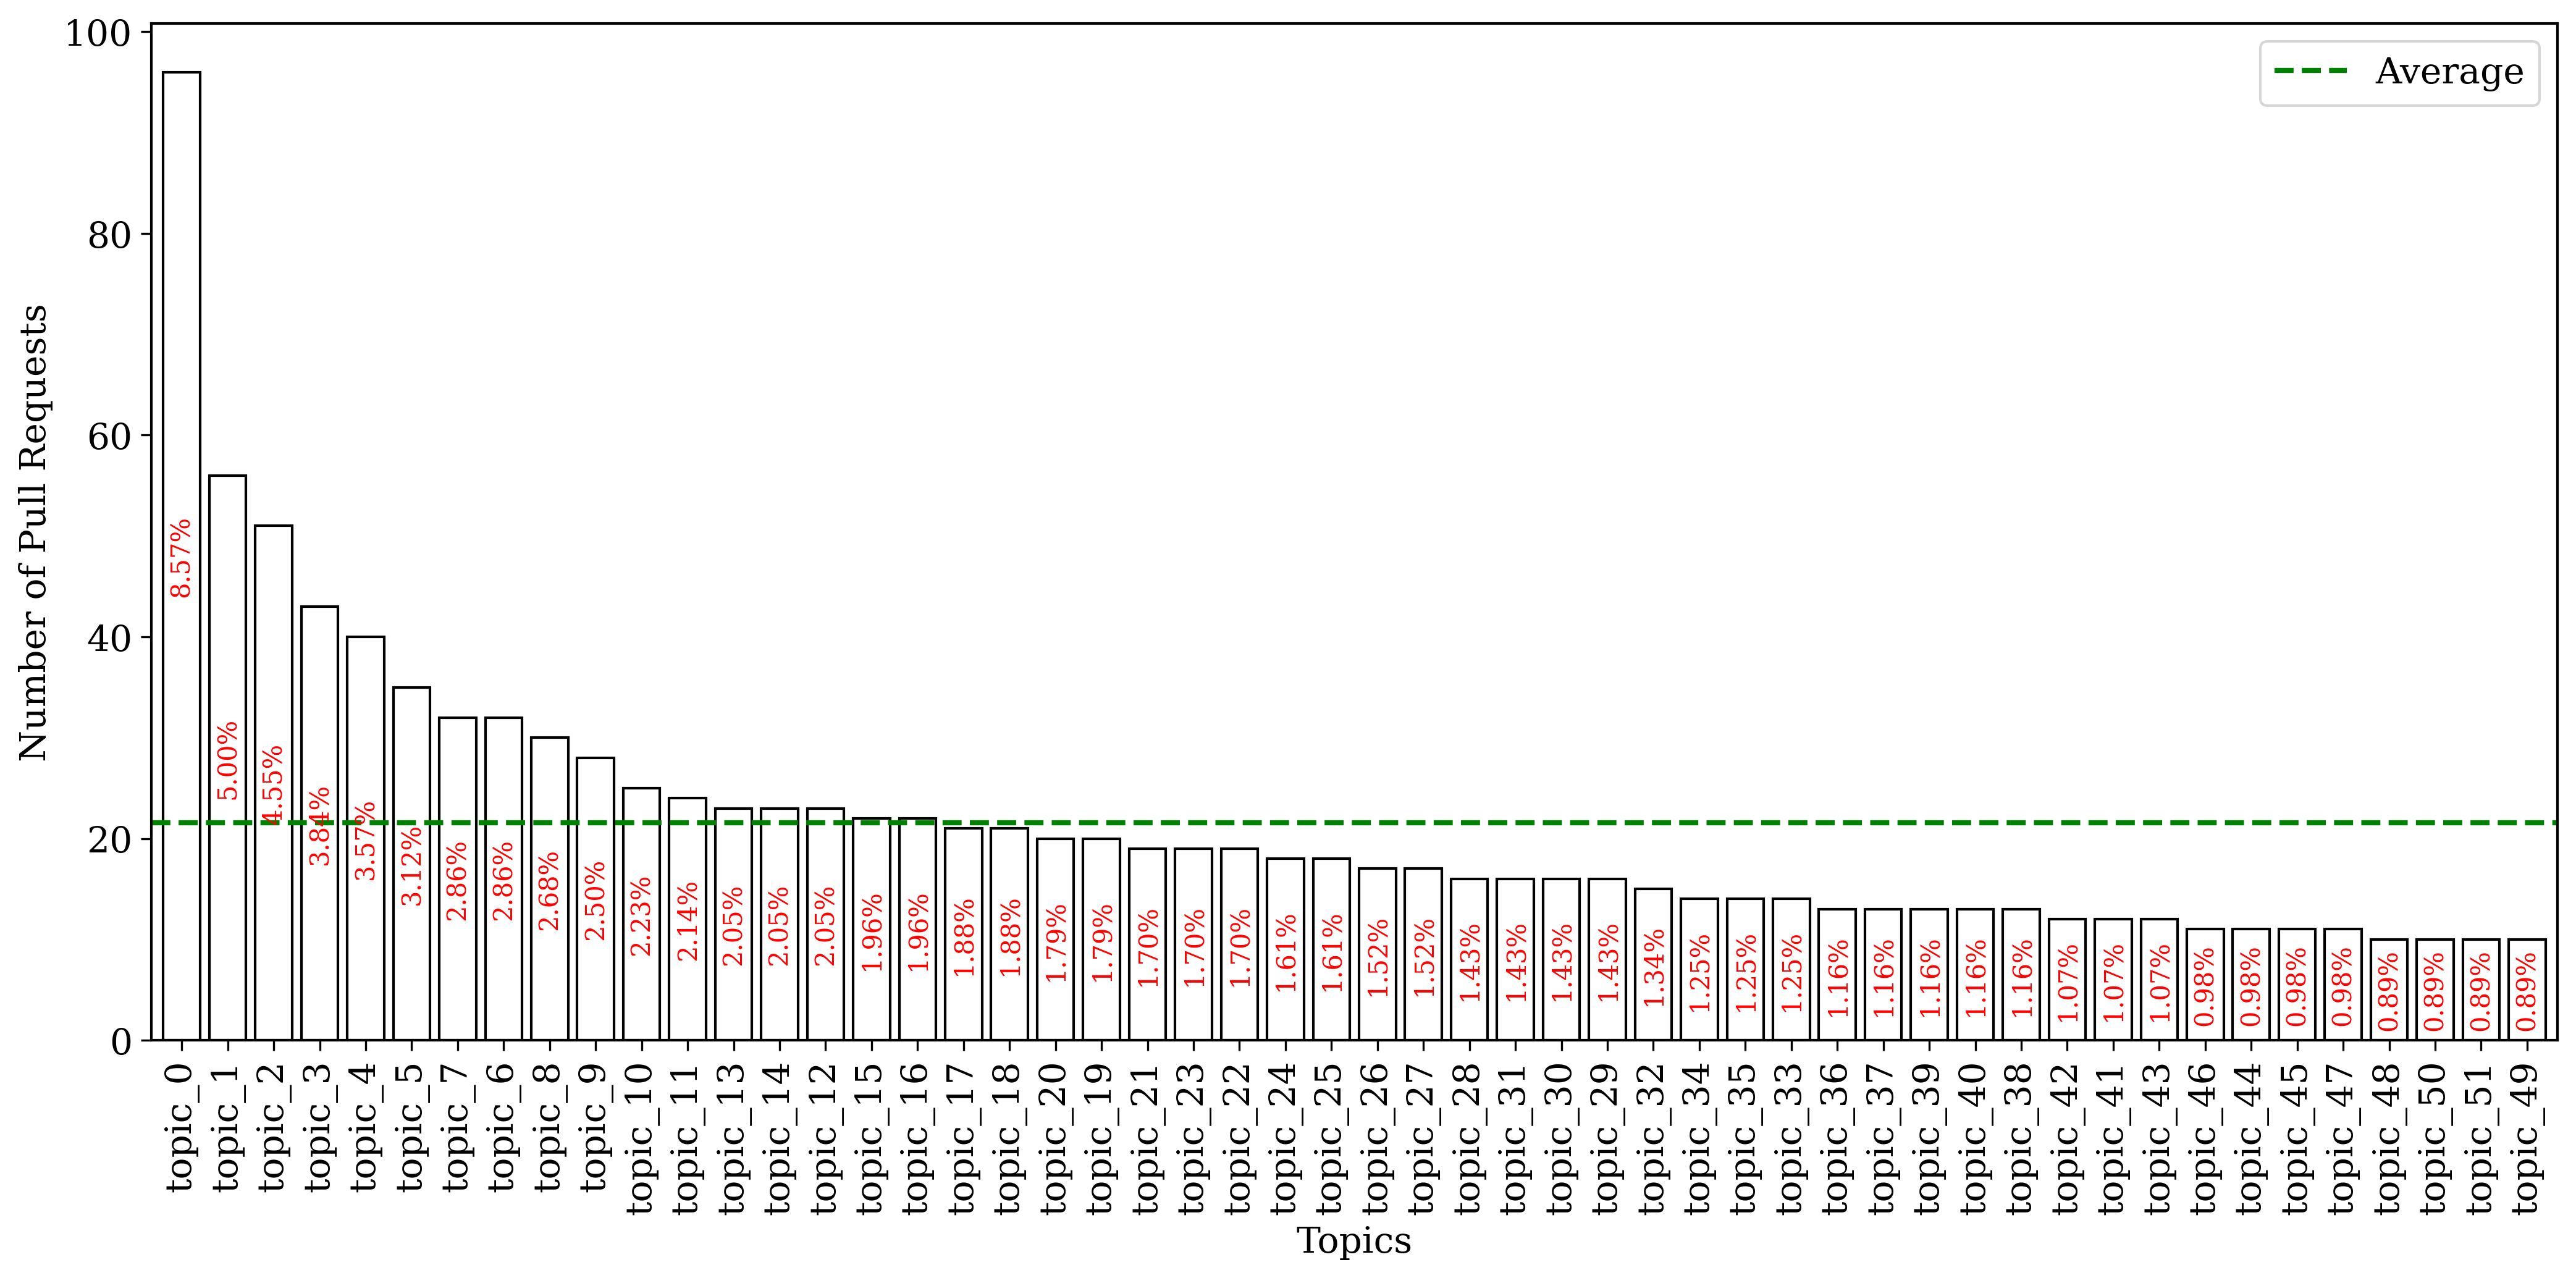

In [30]:
avg_value = np.mean(values)

fig, ax = plt.subplots(figsize=(14, 7))
bars = ax.bar(names, values, color="white", edgecolor="black")

# Add percentage text in the middle of each bar
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height/2.,
            f'{percentage:.2f}%',
            ha='center', va='center', color="red", rotation=90)

ax.axhline(avg_value, color="green", linestyle="--", linewidth=2, label="Average")
ax.set_ylabel("Number of Pull Requests")
ax.set_xlabel("Topics")
ax.legend()

plt.xticks(rotation=90)
plt.margins(x=0.005, tight=True)
plt.tight_layout()
plt.show()
